In [1]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

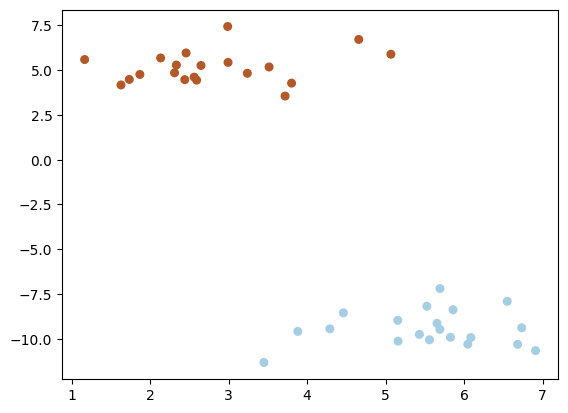

In [3]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, cluster_std=1.0, random_state=10) # 12
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

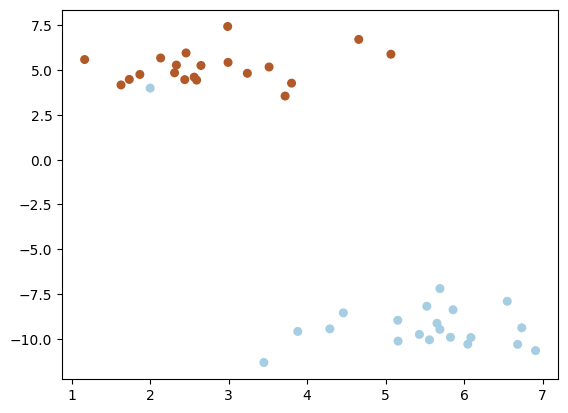

In [4]:
# adding outlier
X = np.append(X, [[2, 4.0]], axis = 0)
y = np.append(y, [0], axis=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [5]:
# 그림 그려줄 함수 정의
def plot_decision(X, y, C=1.0):
  # SVM learning
  clf = svm.SVC(kernel='linear', C=C)
  clf.fit(X, y)
  
  # plot the decision function
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  # plot support vectors
  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
  plt.title(C)
  plt.show()

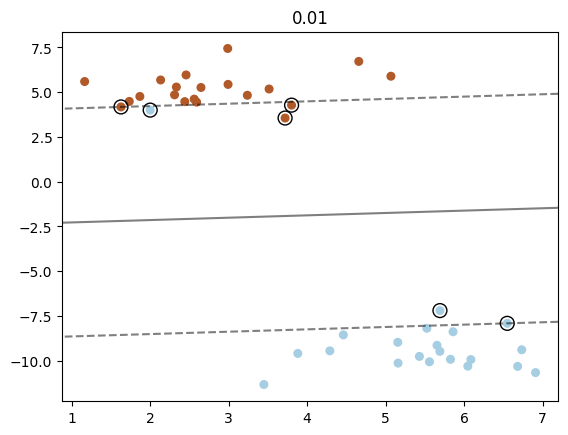

In [6]:
plot_decision(X, y, C=0.01)

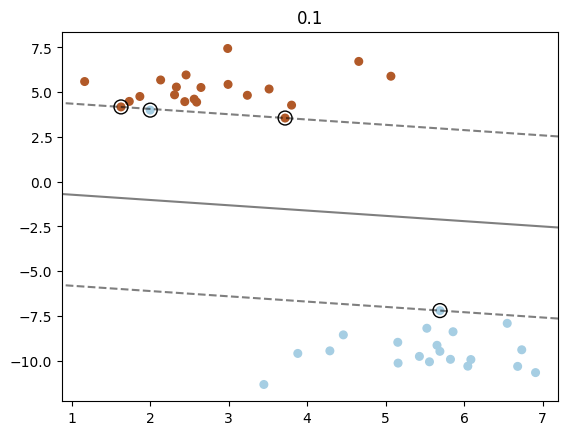

In [7]:
plot_decision(X, y, C=0.1)

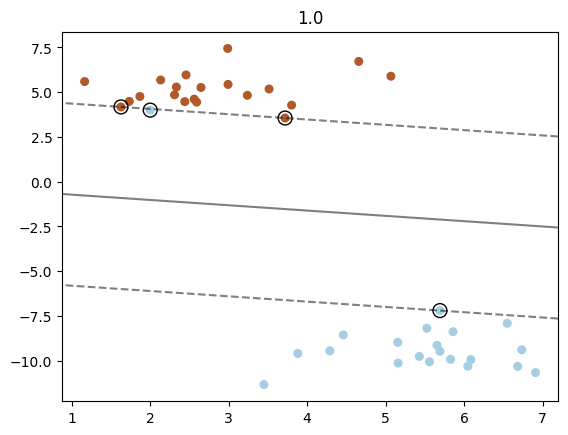

In [8]:
plot_decision(X, y, C=1.0)

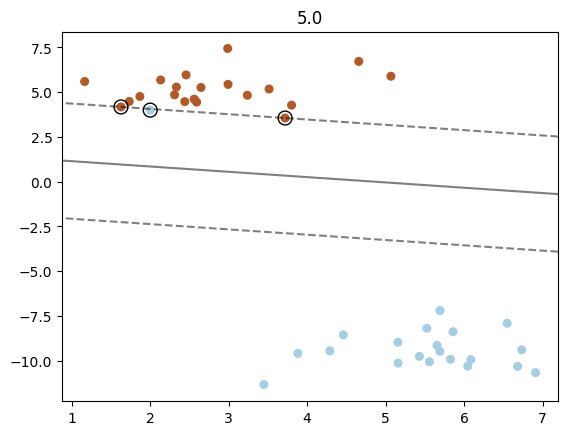

In [9]:
plot_decision(X, y, C=5.0)

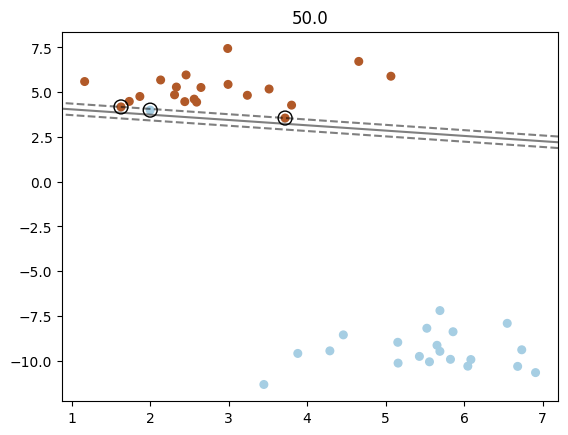

In [10]:
plot_decision(X, y, C=50.0)